In [1]:
import pandas as pd
import pyarrow.parquet as pq
import pyarrow as pa
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
from itertools import cycle
from sklearn.preprocessing import LabelEncoder
import ast

In [2]:
#Leemos el archivo reviews.parquet en un DataFrame
itemsdf = pq.read_table("../0-DATA/australian_users_itemsETL.parquet").to_pandas()
itemsdf.head(5)

,item_id,item_name,items_count,user_id,playtime_hours
0,10,Counter-Strike,277,76561197970982479,0.10
2,30,Day of Defeat,277,76561197970982479,0.12
8,300,Day of Defeat: Source,277,76561197970982479,78.88
9,240,Counter-Strike: Source,277,76561197970982479,30.88
10,3830,Psychonauts,277,76561197970982479,5.55


In [3]:
itemsdf.describe()

,item_id,items_count,playtime_hours
count,3.246362e+06,3.246362e+06,3.246362e+06
mean,1.771685e+05,2.480118e+02,2.590483e+01
std,1.266634e+05,5.683680e+02,1.119525e+02
min,1.000000e+01,1.000000e+00,2.000000e-02
25%,3.912000e+04,6.500000e+01,7.300000e-01
50%,2.149500e+05,1.220000e+02,3.420000e+00
75%,2.630200e+05,2.280000e+02,1.347000e+01
max,5.286600e+05,7.762000e+03,1.071288e+04


In [4]:
itemsdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3246362 entries, 0 to 5153208
Data columns (total 5 columns):
 #   Column          Dtype  
---  ------          -----  
 0   item_id         int64  
 1   item_name       object 
 2   items_count     int64  
 3   user_id         object 
 4   playtime_hours  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 148.6+ MB


### Analisis de la columnas

'item_id'

In [5]:
item = itemsdf["item_id"].value_counts() # obtenemos la cantidad de juegos por año de lanzamiento
item

item_id
730       42838
4000      41639
550       34535
304930    34089
105600    28244
          ...  
527900        1
302370        1
282960        1
316620        1
485270        1
Name: count, Length: 10050, dtype: int64

'item_name'

In [6]:
cant_juegos = len(itemsdf["item_name"].unique()) # obtenemos la cantidad de software único presente en Steam
cant_juegos

10024

In [7]:
itemname = itemsdf["item_name"].value_counts() # nombres de juegos mas solicitados
itemname

item_name
Counter-Strike: Global Offensive    42838
Garry's Mod                         41639
Left 4 Dead 2                       34535
Unturned                            34089
Terraria                            28244
                                    ...  
Castles                                 1
The Empty Inn                           1
Dr. Bulbaceous                          1
Cue Club 2                              1
Arachnophobia                           1
Name: count, Length: 10024, dtype: int64

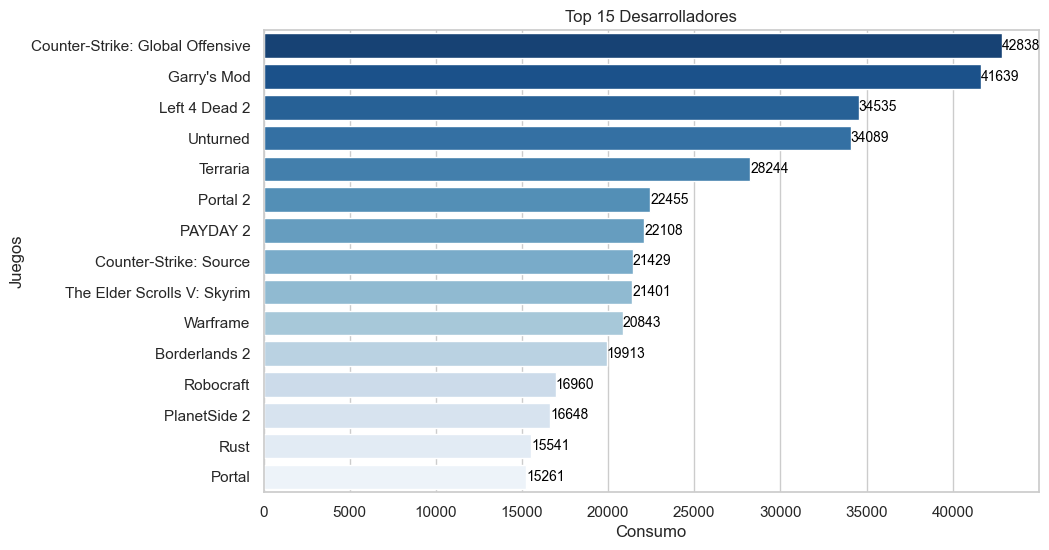

In [8]:
# Creamos un gráfico de barras horizontales
sns.set(style="whitegrid")

# Ajustamos el tamaño del gráfico
plt.figure(figsize=(10, 6))

itemname_data = itemname[:15]
sns.barplot(x=itemname_data.values, y=itemname_data.index, palette="Blues_r")
plt.xlabel('Consumo')
plt.ylabel('Juegos')
plt.title('Top 15 Desarrolladores')

# Añadimos etiquetas en las barras
for i, v in enumerate(itemname_data.values):
    plt.text(v + 0.1, i, str(v), color='black', va='center', fontsize=10)

'items_count'

In [9]:
itemcoun = itemsdf["items_count"].value_counts() # indica cuantos juego por usuario se ha comprado.
itemcoun

items_count
51     18201
63     17747
53     17535
46     17454
55     17420
       ...  
699       43
776       42
742       42
882       42
678        9
Name: count, Length: 924, dtype: int64

In [10]:
itemsdf[itemsdf["user_id"]=="76561197970982479"] #como vemos items count es el numero de veces que el user_id ha usado un juego por eso lo eliminamos ya que podemos optenerlo con un filtro.

,item_id,item_name,items_count,user_id,playtime_hours
0,10,Counter-Strike,277,76561197970982479,0.10
2,30,Day of Defeat,277,76561197970982479,0.12
8,300,Day of Defeat: Source,277,76561197970982479,78.88
9,240,Counter-Strike: Source,277,76561197970982479,30.88
10,3830,Psychonauts,277,76561197970982479,5.55
...,...,...,...,...,...
269,368230,Kingdom: Classic,277,76561197970982479,1.38
272,289130,Endless Legend,277,76561197970982479,9.88
273,268500,XCOM 2,277,76561197970982479,24.92
275,379720,DOOM,277,76561197970982479,13.22


eliminando

In [11]:
# Eliminamos las columnas "publisher", "title", "url","tags", "reviews_url", "specs","early_access" tiene informacion no util
itemsdf = itemsdf.drop(columns=["items_count"])
itemsdf.head(3)

,item_id,item_name,user_id,playtime_hours
0,10,Counter-Strike,76561197970982479,0.10
2,30,Day of Defeat,76561197970982479,0.12
8,300,Day of Defeat: Source,76561197970982479,78.88


'user_id'

In [12]:
#itemsdf[itemsdf["user_id"] == "76561197970982479"]

In [13]:
iduser = itemsdf["user_id"].value_counts() # obtenemos la cantidad de juegos por año de lanzamiento
iduser

user_id
chidvd               3475
thugnificent         3160
phrostb              2984
djnemonic            2545
Steamified           2481
                     ... 
76561198062395953       1
76561198085062722       1
76561198085062486       1
76561197970951048       1
76561198075343291       1
Name: count, Length: 68403, dtype: int64

In [14]:
#obtenemos cantidad de horas jugadas por usucario
items_count = itemsdf.groupby('user_id')['playtime_hours'].unique().explode() # 
items_count= pd.DataFrame(items_count) # convertimos a dataframe
items_count_user = items_count.sort_values('playtime_hours', ascending=False) # ordenamos de mayor a menor
items_count_user

,playtime_hours
user_id,
wolop,10712.88
Evilutional,10588.25
76561198019826668,10540.87
76561198039832932,10223.52
tsunamitad,10001.13
...,...
76561198078062945,0.02
76561198101995099,0.02
76561198066935199,0.02


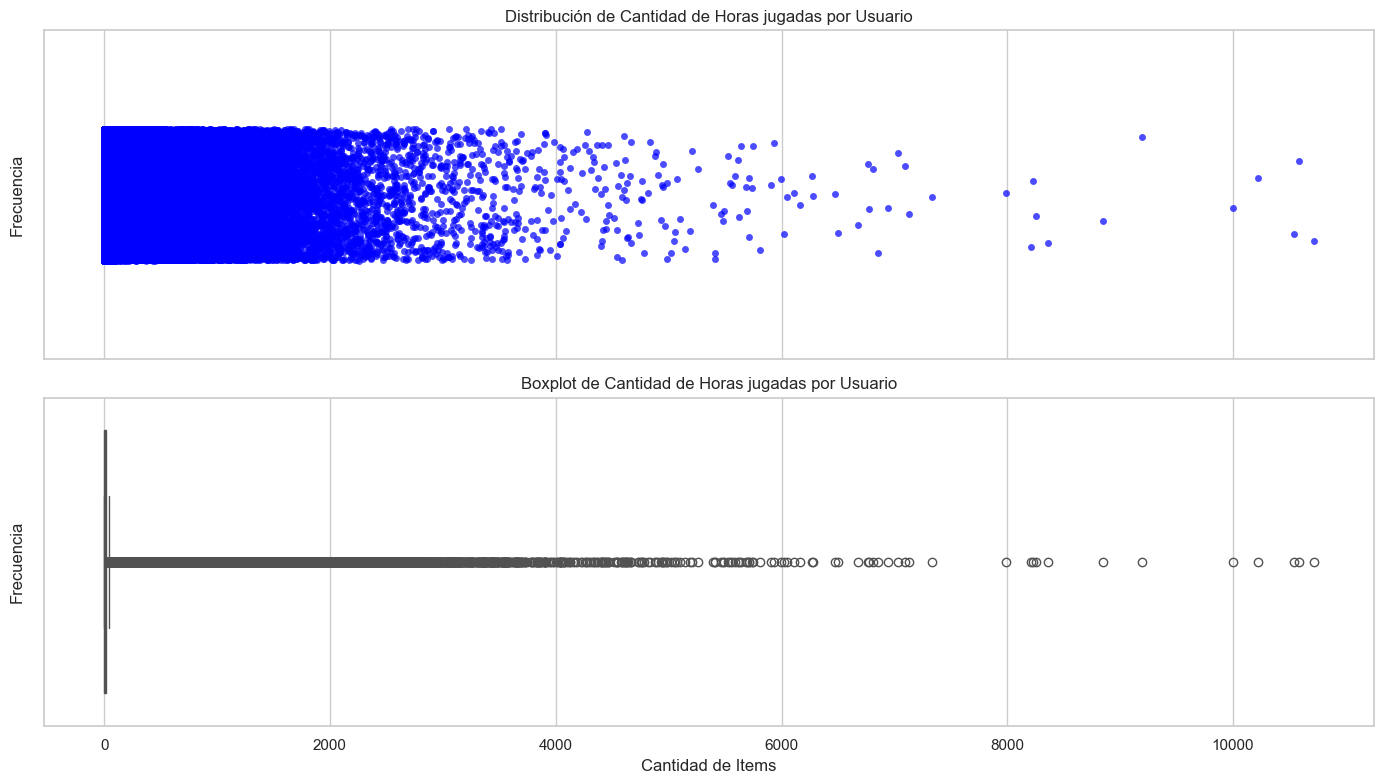

In [15]:
sns.set(style="whitegrid", palette="plasma")

fig, axes = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# Subplot 1 - Stripplot
sns.stripplot(data=items_count_user, x='playtime_hours', ax=axes[0], color="blue", jitter=0.2, alpha=0.7)
axes[0].set_xlabel('Cantidad de Items')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de Cantidad de Horas jugadas por Usuario')

# Subplot 2 - Boxplot
sns.boxplot(data=items_count_user, x='playtime_hours', ax=axes[1], palette="plasma")
axes[1].set_xlabel('Cantidad de Items')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Boxplot de Cantidad de Horas jugadas por Usuario')

plt.tight_layout()
plt.show()

'playtime_hours'

In [16]:
horas = itemsdf["playtime_hours"].value_counts() # obtenemos la cantidad de juegos por año de lanzamiento
horas

playtime_hours
0.02       101586
0.03        34391
0.05        31530
0.07        29127
0.08        27612
            ...  
1077.93         1
888.80          1
733.82          1
551.98          1
579.22          1
Name: count, Length: 48860, dtype: int64

In [17]:
#eliminamos tiempos irrisorios de juegos como segundos tomamos minimo 6 min para adelante.
itemsdf = itemsdf[itemsdf["playtime_hours"] >= 0.1]

reseteando indices

In [18]:
#Reseteamos los indices
itemsdf.reset_index(inplace=True)
itemsdf.head(3)

,index,item_id,item_name,user_id,playtime_hours
0,0,10,Counter-Strike,76561197970982479,0.10
1,2,30,Day of Defeat,76561197970982479,0.12
2,8,300,Day of Defeat: Source,76561197970982479,78.88


In [19]:
#eliminamos el index antiguo que se convirtion en una columna
itemsdf = itemsdf.drop('index', axis=1)
itemsdf.head(5)

,item_id,item_name,user_id,playtime_hours
0,10,Counter-Strike,76561197970982479,0.10
1,30,Day of Defeat,76561197970982479,0.12
2,300,Day of Defeat: Source,76561197970982479,78.88
3,240,Counter-Strike: Source,76561197970982479,30.88
4,3830,Psychonauts,76561197970982479,5.55


Guardando por los cambios generados

In [20]:
tabla = pa.Table.from_pandas(itemsdf) # convertimos el dataframe en una tabla de pyarrow
pq.write_table(tabla,"../0-DATA/australian_users_itemsEDA.parquet") # guardamos la tabla en formato parquet

In [21]:
itemsdf.to_csv("../0-DATA/australian_users_itemsEDA.csv", index=False, encoding="utf-8") 

In [22]:
itemsdf

,item_id,item_name,user_id,playtime_hours
0,10,Counter-Strike,76561197970982479,0.10
1,30,Day of Defeat,76561197970982479,0.12
2,300,Day of Defeat: Source,76561197970982479,78.88
3,240,Counter-Strike: Source,76561197970982479,30.88
4,3830,Psychonauts,76561197970982479,5.55
...,...,...,...,...
3022111,730,Counter-Strike: Global Offensive,ArkPlays7,75.95
3022112,346110,ARK: Survival Evolved,ArkPlays7,10.38
3022113,417860,Emily is Away,76561198323066619,0.13
3022114,304930,Unturned,76561198329548331,11.28
